In [852]:
import pandas as pd
import numpy as np
import warnings

In [853]:
coffee_df = pd.read_csv('coffee_ratings.csv', encoding='utf-8')

In [854]:
coffee_df.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58000,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00000,2200.00000,2075.00000
1,89.92000,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00000,2200.00000,2075.00000
2,89.75000,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00000,1800.00000,1700.00000
3,89.00000,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00000,2200.00000,2000.00000
4,88.83000,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00000,2200.00000,2075.00000


We don't need all the columns to analyze the data later on so we will only keep those that are of interest.

In [855]:
cols_to_keep = [
    'total_cup_points',
    'species',
    'country_of_origin',
    'altitude',
    'region',
    'company',
    'owner',
    'producer',
    'farm_name',
    'harvest_year',
    'grading_date',
    'variety',
    'aroma',
    'flavor',
    'aftertaste',
    'acidity',
    'body',
    'balance',
    'uniformity',
    'clean_cup',
    'sweetness',
    'cupper_points',
    'moisture',
    'category_one_defects',
    'quakers',
    'category_two_defects',
    'altitude_mean_meters',
    'certification_body'
]

coffee_df = coffee_df[cols_to_keep]
coffee_df.head()

,total_cup_points,species,country_of_origin,altitude,region,company,owner,producer,farm_name,harvest_year,...,uniformity,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,certification_body
0,90.58000,Arabica,Ethiopia,1950-2200,guji-hambela,metad agricultural developmet plc,metad plc,METAD PLC,metad plc,2014,...,10.00000,10.00000,10.00000,8.75000,0.12000,0,0.00000,0,2075.00000,METAD Agricultural Development plc
1,89.92000,Arabica,Ethiopia,1950-2200,guji-hambela,metad agricultural developmet plc,metad plc,METAD PLC,metad plc,2014,...,10.00000,10.00000,10.00000,8.58000,0.12000,0,0.00000,1,2075.00000,METAD Agricultural Development plc
2,89.75000,Arabica,Guatemala,1600 - 1800 m,NaN,NaN,grounds for health admin,NaN,"san marcos barrancas ""san cristobal cuch",NaN,...,10.00000,10.00000,10.00000,9.25000,0.00000,0,0.00000,0,1700.00000,Specialty Coffee Association
3,89.00000,Arabica,Ethiopia,1800-2200,oromia,yidnekachew debessa coffee plantation,yidnekachew dabessa,Yidnekachew Dabessa Coffee Plantation,yidnekachew dabessa coffee plantation,2014,...,10.00000,10.00000,10.00000,8.67000,0.11000,0,0.00000,2,2000.00000,METAD Agricultural Development plc
4,88.83000,Arabica,Ethiopia,1950-2200,guji-hambela,metad agricultural developmet plc,metad plc,METAD PLC,metad plc,2014,...,10.00000,10.00000,10.00000,8.58000,0.12000,0,0.00000,2,2075.00000,METAD Agricultural Development plc


Now look at the data types of each column and see if any of them need to be changed.

In [856]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cup_points      1339 non-null   float64
 1   species               1339 non-null   object 
 2   country_of_origin     1338 non-null   object 
 3   altitude              1113 non-null   object 
 4   region                1280 non-null   object 
 5   company               1130 non-null   object 
 6   owner                 1332 non-null   object 
 7   producer              1107 non-null   object 
 8   farm_name             980 non-null    object 
 9   harvest_year          1292 non-null   object 
 10  grading_date          1339 non-null   object 
 11  variety               1113 non-null   object 
 12  aroma                 1339 non-null   float64
 13  flavor                1339 non-null   float64
 14  aftertaste            1339 non-null   float64
 15  acidity              

The altitude column should be of type float64 but it is currently of type object. However, there is a column for the mean altitude so let's look at the altitude values that correspond to missing values in the mean altitude.

In [857]:
coffee_df.loc[coffee_df['altitude_mean_meters'].isnull()]['altitude'].value_counts()

test       1
mmm        1
0          1
huanuco    1
Name: altitude, dtype: int64

In [858]:
coffee_df['harvest_year'].value_counts()

2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2017 / 2018                  19
2014/2015                    19
2009/2010                    12
2010                         10
2010-2011                     6
2016 / 2017                   6
4T/10                         4
4T/2010                       3
2009-2010                     3
Mayo a Julio                  3
March 2010                    3
Abril - Julio                 2
2011/2012                     2
January 2011                  2
08/09 crop                    2
4t/2010                       1
4T72010                       1
December 2009-March 2010      1
Abril - Julio /2011           1
3T/2011                       1
TEST                          1
May-August                    1
mmm     

We see that the harvest_year column is quite messy. For the values that have a range of years (e.g. 2009-2010 or 2009 / 2010) we will take the first year. For the ones with only the last two digits of the year, we'll extract those two digits and add the '20' on the front later on. Finally, we'll extract the year from those that have letters in them. The rest we will assign an NaN value.

In [859]:
extr = coffee_df['harvest_year'].str.extract(r'^(\d{4})', expand=False)
coffee_df['harvest_year_temp'] = extr

unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
regex_list = [r'(\d{4})$', r'^(\d{2})', r'(\d{2})$', r'(\d{4})']

for rg in regex_list:
    new_matched_years = unmatched_years.str.extract(rg, expand=False)
    coffee_df.loc[coffee_df.index.isin(new_matched_years.index), 'harvest_year_temp'] = new_matched_years
    unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
    
unmatched_years = coffee_df.loc[coffee_df['harvest_year_temp'].isnull()]['harvest_year']
unmatched_years[~unmatched_years.isnull()]

16                May-August
169                      mmm
170                     TEST
395    January Through April
477       August to December
492             Mayo a Julio
527            Abril - Julio
814             Mayo a Julio
869             Mayo a Julio
932            Abril - Julio
Name: harvest_year, dtype: object

We see that the only ones that were left are those that don't have a year value. Now let's modify the few entries that need the '20' at the front.

In [860]:
full_years = '20' + coffee_df.loc[coffee_df['harvest_year_temp'].str.len() == 2]['harvest_year_temp']
coffee_df.loc[coffee_df['harvest_year_temp'].str.len() == 2, 'harvest_year_temp'] = full_years

In [861]:
coffee_df['harvest_year_temp'].value_counts()

2012    354
2014    252
2013    210
2015    157
2016    131
2017     89
2011     36
2010     32
2009     18
2008      2
2018      1
Name: harvest_year_temp, dtype: int64

Now that we have successfully cleaned the data for this column, let's replace the column with the temporary one we created.

In [862]:
coffee_df.drop('harvest_year', axis=1, inplace=True)
coffee_df.rename(columns={'harvest_year_temp': 'harvest_year'}, inplace=True)

Let's now look at which columns have missing values and see how we can deal with them.

In [863]:
pd.Series(coffee_df.columns[coffee_df.isnull().any()])

0        country_of_origin
1                 altitude
2                   region
3                  company
4                    owner
5                 producer
6                farm_name
7                  variety
8                  quakers
9     altitude_mean_meters
10            harvest_year
dtype: object

Let's look at how many missing values are in each of the above columns.

In [864]:
missing_vals = coffee_df.isna().sum()
missing_vals[missing_vals != 0]

country_of_origin         1
altitude                226
region                   59
company                 209
owner                     7
producer                232
farm_name               359
variety                 226
quakers                   1
altitude_mean_meters    230
harvest_year             57
dtype: int64

Each of country_of_origin and quakers have one missing value, so we'll remove these rows from the table.

In [865]:
coffee_df = coffee_df.loc[
    (~coffee_df['country_of_origin'].isnull()) |
    (~coffee_df['quakers'].isnull())
]

There are a few missing values in the region column. However, we will keep these rows since they still contain information about the coffee. If we decide to do an analysis of the regions within each country with the best coffee, we'll have to ignore these rows. In fact, let's see if that analysis is worth doing by counting the number of unique regions per country.

In [866]:
coffee_df.groupby('country_of_origin')['region'].nunique()

country_of_origin
Brazil                          21
Burundi                          2
China                            4
Colombia                        16
Costa Rica                      13
Cote d?Ivoire                    1
Ecuador                          2
El Salvador                      6
Ethiopia                        15
Guatemala                       22
Haiti                            5
Honduras                        12
India                            5
Indonesia                       16
Japan                            1
Kenya                            8
Laos                             2
Malawi                           3
Mauritius                        1
Mexico                          91
Myanmar                          6
Nicaragua                        5
Panama                           1
Papua New Guinea                 1
Peru                             6
Philippines                      5
Rwanda                           1
Taiwan                          31
Ta

There are countries with multiple regions so maybe it's best we don't get rid of the region column just yet.

There are multiple missing values in the variety column so we'll have to look further into it and figure out a way to deal with them.

In [867]:
coffee_df.loc[coffee_df['variety'].isnull()]['region'].value_counts()

kona                                                                       21
huila                                                                      19
thailand                                                                   10
sidamo                                                                      9
cauca                                                                       9
                                                                           ..
puno                                                                        1
apaneca                                                                     1
marmelade                                                                   1
52 narino (exact location: mattituy; municipal region: florida code 381     1
sheema south western                                                        1
Name: region, Length: 69, dtype: int64

We see that there are multiple rows with missing values for the variety column. We will replace these values with the most common variety in their corresponding regions.

In [868]:
variety_modes = coffee_df.loc[~coffee_df['variety'].isnull()].groupby('region')[['variety']].apply(lambda x: x.mode().iloc[0])
missing_varieties = coffee_df.loc[(coffee_df['variety'].isnull()) & (~coffee_df['region'].isnull())][['region']]

In [869]:
missing_varieties = missing_varieties.reset_index().merge(variety_modes, on='region', how='inner').set_index('index')
missing_varieties = missing_varieties.loc[~missing_varieties['variety'].isnull()]
coffee_df.loc[coffee_df.index.isin(missing_varieties.index), 'variety'] = missing_varieties['variety']

Now for the rows that have a missing region and missing variety, we'll set the variety to the most common variety in the country.

In [870]:
variety_modes = coffee_df.loc[
    ~coffee_df['variety'].isnull()
].groupby('country_of_origin')[['variety']].apply(lambda x: x.mode().iloc[0])

missing_varieties = coffee_df.loc[
    (coffee_df['variety'].isnull()) & (~coffee_df['country_of_origin'].isnull())
][['country_of_origin']]

missing_varieties = missing_varieties.reset_index().merge(variety_modes, on='country_of_origin', how='inner').set_index('index')
missing_varieties = missing_varieties.loc[~missing_varieties['variety'].isnull()]
coffee_df.loc[coffee_df.index.isin(missing_varieties.index), 'variety'] = missing_varieties['variety']

In [871]:
print('Number of missing values in the "variety" column:', coffee_df.loc[coffee_df['variety'].isnull()].shape[0])

Number of missing values in the "variety" column: 7


Since now there are only six rows with a missing value for the variety column, we will get rid of these.

In [872]:
coffee_df = coffee_df.loc[~coffee_df['variety'].isnull()]

Now let's look at the missing values in the mean altitude column and see if we can replace them with their value in the altitude column. To do so, let's look at the rows with a non-missing altitude value that have a missing mean altitude value.

In [873]:
missing_mean_alt = coffee_df.loc[coffee_df['altitude_mean_meters'].isnull()]
missing_mean_alt[~missing_mean_alt['altitude'].isnull()]

,total_cup_points,species,country_of_origin,altitude,region,company,owner,producer,farm_name,grading_date,...,clean_cup,sweetness,cupper_points,moisture,category_one_defects,quakers,category_two_defects,altitude_mean_meters,certification_body,harvest_year
169,84.50000,Arabica,Brazil,mmm,mmm,NaN,daniel friedlander,mmm,NaN,"March 23rd, 2011",...,10.00000,10.00000,8.13000,0.00000,0,0.00000,4,nan,NUCOFFEE,NaN
170,84.50000,Arabica,Brazil,test,test,NaN,alexandra katona-carroll,NaN,NaN,"March 22nd, 2011",...,10.00000,10.00000,7.75000,0.00000,2,0.00000,0,nan,NUCOFFEE,NaN
687,82.42000,Arabica,Peru,huanuco,peru,sustainable harvest,dane loraas,NaN,NaN,"January 21st, 2014",...,10.00000,10.00000,7.50000,0.00000,0,0.00000,3,nan,Specialty Coffee Association,2013
986,81.08000,Arabica,Ethiopia,0,sidamo,kerchanshe trading plc,kerchanshe,Kerchanshe trading plc,NaN,"July 14th, 2017",...,10.00000,10.00000,7.25000,0.11000,0,0.00000,1,nan,Specialty Coffee Institute of Asia,2016


There are only four rows like this, and they all have invalid values for the altitude. We'll have to figure out another way to deal with missing values for the mean altitude. If two different coffees are grown in the same region, it's plausible that they are grown at similar altitudes and we could use this information to replace some of the missing values. To see if this makes sense, let's look at the standard deviation of mean altitude by region for the regions that don't have a missing mean altitude.

In [874]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

mean_alt_std = coffee_df.loc[~coffee_df['altitude_mean_meters'].isnull()].groupby('region')[['altitude_mean_meters']].std()
mean_alt_std = mean_alt_std.loc[
    (~mean_alt_std['altitude_mean_meters'].isnull()) &
    (mean_alt_std.index.isin(missing_mean_alt['region'].unique()))
]
mean_alt_std

,altitude_mean_meters
region,
antigua,29.18429
arusha,131.81426
cauca,170.83352
central valley,48.79500
cerrado,3526.18962
eastern uganda,35.35534
grama valley,50.00000
guayata,57.73503
huila,502.01676


Looking at the table above we see that there are some regions with a very large standard deviation. Given this new information, let's look at the standard deviation of all regions across the whole data set and determine which ones have values that are skewing the distribution.

In [875]:
region_alt_std = coffee_df.groupby('region')[['altitude_mean_meters']].std()
region_alt_std = region_alt_std[
    (~region_alt_std['altitude_mean_meters'].isnull()) &
    (region_alt_std['altitude_mean_meters'] != 0)
].sort_values('altitude_mean_meters', ascending=False)
region_alt_std

,altitude_mean_meters
region,
huehuetenango,47159.28856
jinotega,31436.59404
oriente,23247.85481
cerrado,3526.18962
amatenango de la frontera,1122.88557
...,...
central region,28.86751
"el balsamo, quezaltepec",28.86751
vale da grama,23.93568


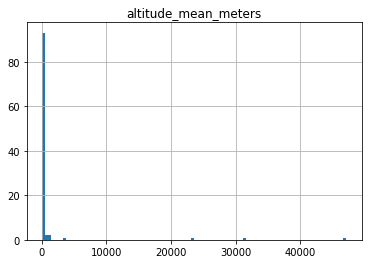

In [876]:
region_alt_std.hist(bins=100);

Looking at the distribution of standard deviations, we'll choose an "error" margin of 500 meters. The reason I call it an "error" is not because it actually is an error but rather because some regions can be very large in size and elevation can vary vastly within the same region (e.g. Yunnan in China). We'll only check for unreasonable values of altitude for regions with a standard deviation higher than 500 meters.

In [877]:
region_alt_std = region_alt_std.loc[region_alt_std['altitude_mean_meters'] > 350]

In [878]:
coffee_df.loc[
    (coffee_df['region'].isin(region_alt_std.index)) & 
    (~coffee_df['altitude_mean_meters'].isnull())
].groupby('region')[['altitude_mean_meters']].describe()

altitude_mean_meters                          \
                                         count        mean         std   
region                                                                   
amatenango de la frontera              2.00000   806.00000  1122.88557   
cerrado                                8.00000  2275.87500  3526.18962   
chikmagalur                            9.00000  1305.55556   966.45113   
huehuetenango                         16.00000 13319.16320 47159.28856   
huila                                 94.00000  1539.15957   502.01676   
jinotega                              12.00000 10176.04167 31436.59404   
menglian                               2.00000  1175.00000   459.61941   
mzuzu                                  8.00000  1486.62500   442.83468   
oriente                               66.00000  4166.41464 23247.85481   
south of minas                        66.00000   860.90909   409.12066   
sul de minas                           4.00000   956.25000   554.66769   
tapachula                              6.00000  1491.66667   374.72212   
tarrazu                               18.00000  1643.62222   420.99133   

                                                                       \
                                 min        25%        50%        75%   
region                                                                  
amatenango de la frontera   12.00000  409.00000  806.00000 1203.00000   
cerrado                    900.00000  967.75000 1075.00000 1112.50000   
chikmagalur                750.00000  750.00000  750.00000 1000.00000   
huehuetenango             1099.41360 1377.01020 1688.20000 1712.97600   
huila                      165.00000 1700.00000 1750.00000 1775.00000   
jinotega                   925.00000 1000.00000 1100.00000 1250.00000   
menglian                   850.00000 1012.50000 1175.00000 1337.50000   
mzuzu                     1100.00000 1195.00000 1432.00000 1487.25000   
oriente                    157.88640 1219.20000 1310.64000 1310.64000   
south of minas               1.00000  890.00000  934.00000 1100.00000   
sul de minas               125.00000  931.25000 1225.00000 1250.00000   
tapachula                  900.00000 1287.50000 1600.00000 1800.00000   
tarrazu                    185.00000 1625.15000 1850.00000 1850.00000   

                                        
                                   max  
region                                  
amatenango de la frontera   1600.00000  
cerrado                    11000.00000  
chikmagalur                 3000.00000  
huehuetenango             190164.00000  
huila                       1900.00000  
jinotega                  110000.00000  
menglian                    1500.00000  
mzuzu                       2500.00000  
oriente                   190164.00000  
south of minas              1268.00000  
sul de minas                1250.00000  
tapachula                   1800.00000  
tarrazu                     1900.00000

We see that the first region has a minimum elevation of 12 meters. Let's look at the other elevations in this region.

In [879]:
def show_region(region, cols_to_show):
    return coffee_df.loc[coffee_df['region'] == region][cols_to_show]

In [880]:
show_region('amatenango de la frontera', ['region', 'altitude_mean_meters', 'altitude', 'company', 'farm_name'])

,region,altitude_mean_meters,altitude,company,farm_name
924,amatenango de la frontera,1600.00000,1600,ecomtrading,productor independiente guadalupe victoria
1203,amatenango de la frontera,12.00000,12oo,café pico de loro,pico del oro


Looking at the altitude value, it looks that during the data entry process they used the letter "o" instead of 0 on the second entry. If you look up the location of the company on Google Maps (use Terrain mode) you'll see that it is located at an elevation of approximately 1100m. Using this information, we can assume that the altitude value, and the mean altitude as well, should be 1200m. We'll correct that value below.

In [881]:
coffee_df.loc[1203, 'altitude_mean_meters'] = 1200

The second region has a maximum value that doesn't make sense, so let's look at it.

In [882]:
show_region('cerrado', ['country_of_origin', 'region', 'variety', 'altitude_mean_meters', 'altitude', 'company', 'farm_name'])

,country_of_origin,region,variety,altitude_mean_meters,altitude,company,farm_name
218,Brazil,cerrado,Catuai,1150.00000,1150,cafebras comercio de cafés do brasil sa,pantano
543,Brazil,cerrado,Moka Peaberry,11000.00000,11000 metros,expocaccer,fazenda pantano
566,Brazil,cerrado,Catuai,900.00000,900,cafebras comercio de cafés do brasil sa,santa fé 2
706,Brazil,cerrado,Catuai,982.00000,982,olam,fazenda são pedro
707,Brazil,cerrado,Catuai,nan,NaN,volcafe ltda.,NaN
765,Brazil,cerrado,Mundo Novo,nan,NaN,bourbon specialty coffees,NaN
810,Brazil,cerrado,Catuai,1050.00000,1050m,nucoffee,são josé da lagoa
856,Brazil,cerrado,Mundo Novo,925.00000,900-950m,NaN,cianorte
936,Brazil,cerrado,Catuai,1100.00000,1100,cafebras comercio de cafés do brasil sa,fazenda rio brilhante
953,Brazil,cerrado,Catuai,1100.00000,1100,cafebras comercio de cafés do brasil sa,fazenda sacramento


The entry with index 543 has a mean altitude value that is not possible anywhere in the world. I looked up the farm and variety of coffee and found that the farm is located at altitudes between 1100m and 1200m. Once again, there was an error in the data entry process where an extra 0 was added at the end. We'll replace the mean altitude with the mean of the farm altitudes: 1150m. This also matches the mean altitude of the first entry which comes from the same farm (fazenda in Portuguese means farm, so Pantano farm).

In [883]:
coffee_df.loc[543, 'altitude_mean_meters'] = 1150

Let's keep looking at the other entries.

In [884]:
show_region('chikmagalur', ['country_of_origin', 'region', 'altitude_mean_meters', 'altitude', 'company', 'farm_name'])

,country_of_origin,region,altitude_mean_meters,altitude,company,farm_name
1313,India,chikmagalur,1000.00000,1000m,sethuraman estate,sethuraman estate
1316,India,chikmagalur,3000.00000,3000',"cafemakers, llc",NaN
1317,India,chikmagalur,750.00000,750m,cafemakers,sethuraman estates
1323,India,chikmagalur,750.00000,750m,cafemakers,sethuraman estates
1326,India,chikmagalur,1000.00000,1000m,sethuraman estate,sethuraman estate
1327,India,chikmagalur,750.00000,750m,"cafemakers, llc",sethuraman estates
1331,India,chikmagalur,750.00000,750m,cafemakers,sethuraman estates
1332,India,chikmagalur,750.00000,750m,"cafemakers, llc",sethuraman estates
1333,United States,chikmagalur,3000.00000,3000',"cafemakers, llc",sethuraman estates


We see that the country of origin for this region is not unique. We'll have to keep this mind and guarantee that each region corresponds to a single country unless two countries share the same region names. For now, let's look at the altitudes. There are two entries with an altitude of 3000m which is much higher than the other ones. Both entries come from the same company and farm as the ones that have a mean altitude of 750m so we'll use that as the replacement value. Furthermore, this region only exists in India so we'll change the country of origin for the entry with the wrong country.

In [897]:
coffee_df.loc[[1316, 1333], 'altitude_mean_meters'] = 750
coffee_df.loc[1333, 'country_of_origin'] = 'India'

Let's keep exploring!

In [885]:
show_region('huehuetenango', ['country_of_origin', 'region', 'altitude_mean_meters', 'altitude', 'company', 'farm_name'])

,country_of_origin,region,altitude_mean_meters,altitude,company,farm_name
69,Guatemala,huehuetenango,1731.26400,5600-5760 metros,exportcafe,asoperc
76,Guatemala,huehuetenango,1770.00000,1770,essence coffee,el injerto s.a.
87,Guatemala,huehuetenango,1400.00000,1400 msm,the coffee source inc.,coop. hoja blanca - fedecocagua
195,Guatemala,huehuetenango,1099.41360,3607,exportcafe,finca san vicente
213,Guatemala,huehuetenango,1116.78720,3664,exportcafe,finca la joya
243,Guatemala,huehuetenango,1706.88000,5440 - 5760 metros,exportcafe,finca los cerros y anexos
323,Guatemala,huehuetenango,1356.66480,4451 metros,exportcafe,finca las cuevitas
336,Guatemala,huehuetenango,1128.36960,3702,exportcafe,finca santa clara
551,Guatemala,huehuetenango,1706.88000,5440-5760 metros,exportcafe,finca los cerros y anexos
673,Guatemala,huehuetenango,1600.00000,1600,NaN,NaN


Immediately we see on entry 896 that a mean altitude of 190164m is just... ridiculous. The location of the farm is at an altitude of 1750m so we'll use that as the replacement value.

In [886]:
coffee_df.loc[896, 'altitude_mean_meters'] = 1750

In [887]:
huila = show_region('huila', ['country_of_origin', 'region', 'altitude_mean_meters', 'altitude'])
huila.loc[~huila['altitude_mean_meters'].isnull()].sort_values('altitude_mean_meters')

,country_of_origin,region,altitude_mean_meters,altitude
595,Colombia,huila,165.00000,1.65
435,Colombia,huila,175.00000,175
375,Colombia,huila,439.00000,439
377,Colombia,huila,442.00000,442
701,Colombia,huila,442.00000,442 msnm
...,...,...,...,...
386,Colombia,huila,1813.00000,1813
361,Colombia,huila,1850.00000,1850 msnm
549,Colombia,huila,1900.00000,1800 - 2000
805,Colombia,huila,1900.00000,1800 - 2000


The Huila region in the beautiful country of Colombia has a minimum elevation of 51m and a maximum elevation of 5270m! Given the vast range in elevation of this region, and the fact that all the mean altitudes fall within this range, there is no reason to believe that any of the values for the mean altitude are wrong. On to the next region.

In [888]:
show_region('jinotega', ['country_of_origin', 'region', 'altitude_mean_meters', 'altitude'])

,country_of_origin,region,altitude_mean_meters,altitude
124,Nicaragua,jinotega,925.00000,800-1050m
217,Nicaragua,jinotega,1000.00000,de 900 a 1100 msnm
317,Nicaragua,jinotega,1250.00000,1250
758,Nicaragua,jinotega,1000.00000,1000
875,Nicaragua,jinotega,nan,NaN
964,Nicaragua,jinotega,1100.00000,1100
988,Nicaragua,jinotega,1100.00000,1100 m.o.s.l.
1040,Nicaragua,jinotega,110000.00000,1100.00 mosl
1106,Nicaragua,jinotega,1187.50000,1100 - 1275 mts
1122,Nicaragua,jinotega,1250.00000,1250


The value at index 1040 is too high. If we look at the altitude value of this entry and the one above it, they are the same. During the data entry process, it looks like the zeroes in the decimal values of the altitude were added to the mean altitude and that's why it's two orders of magnitude larger than it should be. We'll fix it by replacing it with the real value.

In [889]:
coffee_df.loc[1040, 'altitude_mean_meters'] = 1100

Only two more regions to go.

In [890]:
oriente = show_region(
    'oriente', 
    ['country_of_origin', 'variety', 'region', 'altitude_mean_meters', 'altitude', 'company', 'farm_name', 'producer'])
oriente_not_null = oriente.loc[~oriente['altitude_mean_meters'].isnull()].sort_values('altitude_mean_meters')
oriente_not_null

,country_of_origin,variety,region,altitude_mean_meters,altitude,company,farm_name,producer
833,Guatemala,Bourbon,oriente,157.88640,518,"unex guatemala, s.a.",la esmeralda,JESUS RAMIREZ
565,Guatemala,Bourbon,oriente,1219.20000,4000psn,"unex guatemala, s.a.",el papaturro,AMILCAR LAPOLA
1157,Guatemala,Bourbon,oriente,1219.20000,4000,"unex guatemala, s.a.",la esmeralda,JESUS RAMIREZ
656,Guatemala,Bourbon,oriente,1219.20000,4000,"unex guatemala, s.a.",la esperanza,MARGARITA AVILA DE NUYENS
1174,Guatemala,Bourbon,oriente,1219.20000,4000 p.s.n.m.,"unex guatemala, s.a.",el papaturro,AMILCAR LAPOLA
...,...,...,...,...,...,...,...,...
451,Guatemala,Bourbon,oriente,1650.00000,1400-1900 psn,"unex guatemala, s.a.","la esperanza, margarita nuyes",PAPATURRO
1014,Guatemala,Bourbon,oriente,1901.00000,1901,"unex guatemala, s.a.",la esperanza,"AGRICOLA EL PILAR, S.A."
441,Guatemala,Bourbon,oriente,1901.00000,1901,"unex guatemala, s.a.",beneficio el torreon,AGROINDUSTRIAS CAFETALERAS
815,Guatemala,Bourbon,oriente,1901.00000,1901,"unex guatemala, s.a.",la esperanza,"AGRICOLA EL PILAR, S.A."


The first and last entries look incorrect. Furthermore, there are a lot of entries with the same company and farm, and that the altitude varies between these. We'll have to look at the unique values for each (farm, producer) pair and determine how we will clean up the mean altitude values.

In [891]:
oriente_not_null.groupby(['farm_name', 'producer'])['altitude', 'altitude_mean_meters'].agg(['unique'])

C:\Users\diego\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


altitude  \
                                                                                                            unique   
farm_name                     producer                                                                               
agropecuaria quiagral         AGROPECUARIA QUIAGRAL                                                         [4300]   
beneficio el torreon          AGROINDUSTRIAS CAFETALERAS                                                    [1901]   
conquista / morito            Conquista / Morito                                                        [4600 ft.]   
                              Conquista/Morito                                                          [4600 ft.]   
                              ConquistaMorito                                                           [4600 ft.]   
el morito                     ROBERTO MONTERROSO                                                            [4300]   
el papaturro                  AMILCAR LAPOLA                         [4000psn, 4000 p.s.n.m., 4000 psnm, 4000 psn]   
el sacramento                 LUIS RODRIGUEZ                                                                [4300]   
finca el morito               ROBERTO MONTERROSO                                                            [4300]   
finca quequesquez             Finca Quequesquez                                                             [1450]   
la castellana                 AGRIPEC DE LA VEGA Y CIA.                                                     [4300]   
la esmeralda                  JESUS RAMIREZ                                                            [518, 4000]   
la esperanza                  AGRICOLA EL PILAR, S.A.                                              [1901, 1901.64]   
                              MARGARITA AVILA DE NUYENS                                                     [4000]   
la esperanza y anexos         MARGARITA DE NUYENS                                                           [4300]   
                              MARGARITA DE NUYENS Y/O CARLOS NUYENS                                         [4300]   
la esperanza, margarita nuyes PAPATURRO                                                            [1400-1900 psn]   
la union monte verde          AGRICOLA MONTE VERDE, S.A.                                                    [4300]   
                              OTTO BECKER                                                                   [4300]   
several                       UNEX                                                                          [1400]   
various                       VARIOS                                      [4000 p.s.n.m., 4000 psnm, 4000 p.s.n.m]   
                              Varios                                                                        [4000]   

                                                                    altitude_mean_meters  
                                                                                  unique  
farm_name                     producer                                                    
agropecuaria quiagral         AGROPECUARIA QUIAGRAL                            [1310.64]  
beneficio el torreon          AGROINDUSTRIAS CAFETALERAS                        [1901.0]  
conquista / morito            Conquista / Morito                               [1402.08]  
                              Conquista/Morito                                 [1402.08]  
                              ConquistaMorito                                  [1402.08]  
el morito                     ROBERTO MONTERROSO                               [1310.64]  
el papaturro                  AMILCAR LAPOLA                                    [1219.2]  
el sacramento                 LUIS RODRIGUEZ                                   [1310.64]  
finca el morito               ROBERTO MONTERROSO                               [1310.64]  
finca quequesquez             Finca Quequesquez                

First, we notice that for the farm "la esmeralda" there are two unique values for the altitude. Looking up the farm it is located at an altitude of around 1200m which is the value for the other entries on this farm. We will replace the incorrect value with this one.
<br><br>
Looking at the pair of farm "la esperanza" and producer "AGRICOLA EL PILAR, S.A" we see that there is the same problem as before with the decimal values. Furthermore, even though the two producers fall under the same farm, they are located in different areas. Agricola El Pilar is located at an altitude of around 1900m. We will replace the incorrect entry with the mean altitude of the correct one: 1901m.
<br><br>
Finally, let's check out the last region.

In [892]:
coffee_df.loc[833, 'altitude_mean_meters'] = 1200
coffee_df.loc[1144, 'altitude_mean_meters'] = 1901

In [893]:
show_region('sul de minas', ['country_of_origin', 'region', 'altitude_mean_meters', 'altitude', 'farm_name'])

,country_of_origin,region,altitude_mean_meters,altitude,farm_name
512,Brazil,sul de minas,1250.00000,1250,sertao farm
852,Brazil,sul de minas,1250.00000,1250,sertao farm
920,Brazil,sul de minas,1200.00000,1200,pereira estate coffee
930,Brazil,sul de minas,125.00000,1.25,sertao


This one's easy. It looks like the algorithm that populated altitude_mean_meters interpreted an altitude of 1.25km as 125m. We'll just replace it with the value from the other entries on the same farm.

In [894]:
coffee_df.loc[930, 'altitude_mean_meters'] = 1250

After cleaning up these regions, I realized that the altitude columns are very dirty and it took some detailed investigation to correct outliers. Now I'm thinking whether there are other outliers for regions with lower standard deviations in altitude. To check this, let's look at a boxplot of the mean altitudes across all regions and investigate the outliers.

In [895]:
coffee_df[['altitude_mean_meters']].describe()

,altitude_mean_meters
count,1104.00000
mean,1334.61684
std,478.67453
min,1.00000
25%,1100.00000
50%,1310.64000
75%,1600.00000
max,4287.00000


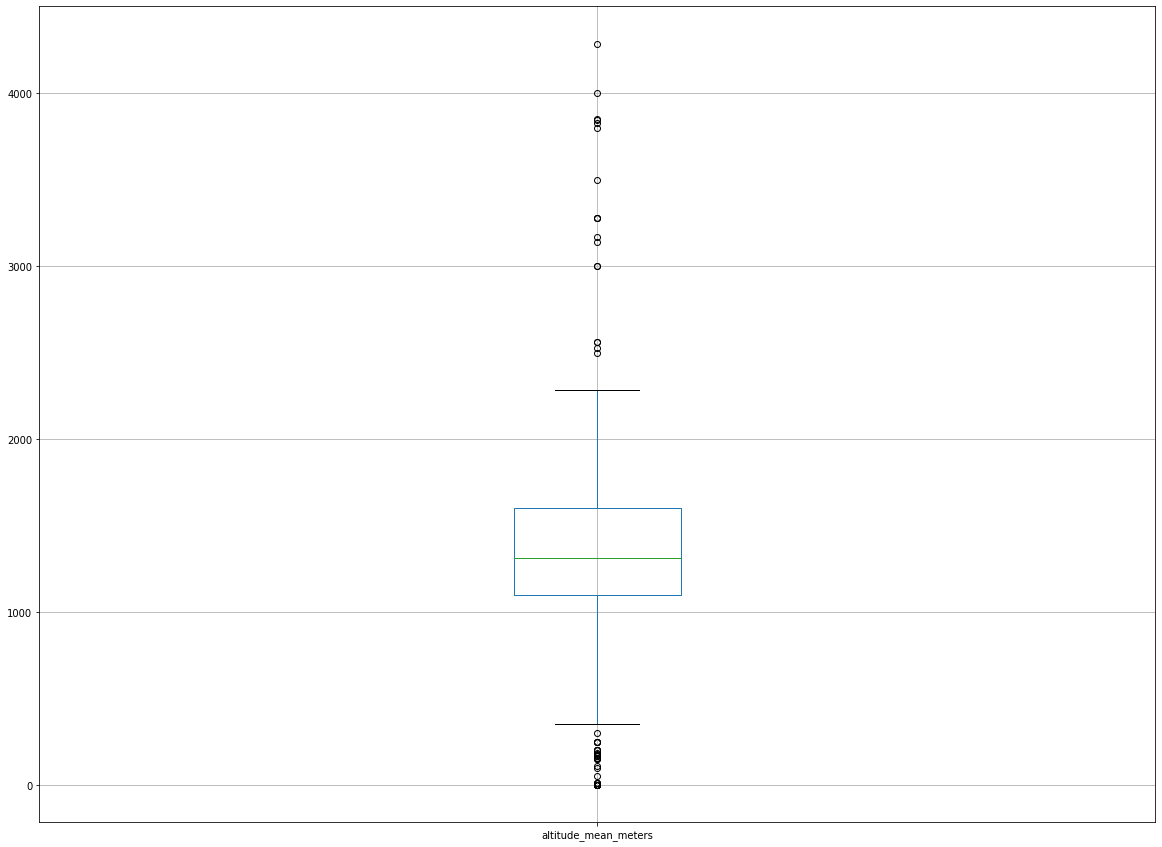

In [896]:
coffee_df.boxplot(column='altitude_mean_meters', figsize=(20,15));

First let's look at the outliers with values greater than Q3 + 1.5IQR (top whisker).

In [901]:
Q1 = coffee_df['altitude_mean_meters'].quantile(0.25)
Q3 = coffee_df['altitude_mean_meters'].quantile(0.75)
IQR = Q3 - Q1

coffee_df.loc[
    coffee_df['altitude_mean_meters'] > Q3 + 1.5*IQR
][[
    'country_of_origin', 'region', 'altitude_mean_meters', 'altitude', 'company', 'farm_name', 'producer'
]].sort_values(['country_of_origin', 'region'])

,country_of_origin,region,altitude_mean_meters,altitude,company,farm_name,producer
628,Colombia,52 narino (exact location: mattituy; municipal...,3850.00000,1800 meters (5900,NaN,la canada,Mariana Cabrera Pantoja; I.D.: 27 423 625
193,Colombia,nariño,2560.00000,2560,carcafe ltda,NaN,JOSE ALBEIRO GOMEZ
274,Colombia,nariño,2527.00000,2527,carcafe ltda,NaN,Jose Albeiro gomez
89,Colombia,pasto,2560.00000,2.560 msnm,carcafe ltda,NaN,JOSE ALBEIRO GOMEZ / LUIS JABER REALPE
215,Guatemala,norte,3280.00000,3280,"unex guatemala, s.a.",chapultepec,CHAPULTEPEC
837,Guatemala,norte,3280.00000,3280,"unex guatemala, s.a.",chapultepec,CHAPULTEPEC
1001,Guatemala,norte,3280.00000,3280,"unex guatemala, s.a.",chapultepec,CHAPULTEPEC
1318,India,chikmagalur karnataka india,3140.00000,3140,kaapi royale,sethuraman estate kaapi royale,Nishant Gurjer Kaapi Royale
1312,India,chikmagalur karnataka indua,3170.00000,3170,kaapi royale,sethuraman estate kaapi royale,Nishant Gurjer Kaapi Royale
1269,Indonesia,indonesia,3500.00000,3500,NaN,1,1


Luckily, there aren't too many of these. I have gone through each one-by-one and made the proper corrections below. I'm not going to explain each one individually because I don't want to make this already long notebook longer, but it was a similar process as before :)

In [902]:
coffee_df.loc[628, 'altitude_mean_meters'] = 1800
coffee_df.loc[628, 'region'] = 'nariño'
coffee_df.loc[[215, 837, 1001], 'altitude_mean_meters'] = 1000
coffee_df.loc[[1318, 1312], 'altitude_mean_meters'] = 950
coffee_df.loc[[1318, 1312], 'region'] = 'chikmagalur'
coffee_df.loc[800, 'altitude_mean_meters'] = 1850
coffee_df.loc[[1123, 1073], 'altitude_mean_meters'] = 1100
coffee_df.loc[1123, 'region'] = 'pyin oo lwin'
coffee_df.loc[840, 'altitude_mean_meters'] = 1220
coffee_df.loc[1038, 'altitude_mean_meters'] = 1165
coffee_df.loc[1098, 'altitude_mean_meters'] = 1300

coffee_df = coffee_df.loc[~coffee_df.index.isin([1269])]

# TODO
* Clean up region names
* Check lower outliers
* Clean up contry of origin

In [520]:
def get_mean(df, col, col_val, col_mean, ignore_idx=False, idx_to_ignore=None):
    if ignore_idx == False:
        return np.round(df.loc[df[col] == col_val][col_mean].mean())
    else:
        try:
            avg_series = df.loc[df[col] == col_val][col_mean]
            avg_series = avg_series[~avg_series.index.isin(idx_to_ignore)]
            return np.round(avg_series.mean())
        except:
            warnings.warn("Must provide 'idx_to_ignore' when 'ignore_idx' is True. Calculating mean without ignoring index.")
            return np.round(df.loc[df[col] == col_val][col_mean].mean())